<a href="https://colab.research.google.com/github/Macleyn/ML/blob/main/%D0%A6%D0%9A_%D0%9C%D0%A4%D0%A2%D0%98/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('train.csv')
df.head()

<ipython-input-3-04d00b4537ee>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.loc[df['Credit_Score'] == 'Poor']['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,9125
High_spent_Medium_value_payments,4439
Low_spent_Medium_value_payments,4211
High_spent_Small_value_payments,3088
High_spent_Large_value_payments,2979
Low_spent_Large_value_payments,2931
!@9#%8,2225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.drop(['ID', 'Name', 'Customer_ID', 'SSN'], axis=1, inplace=True)

In [7]:
df.shape

(100000, 24)

In [8]:
df.dropna(inplace=True)
df.shape

(58933, 24)

In [9]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,January,28_,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,March,28,Teacher,34847.84_,3037.986667,2,1385,6,1,Credit-Builder Loan,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard


In [10]:
df.drop(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour'], axis=1, inplace=True)

In [11]:
for column in df.iloc[:,:-1].select_dtypes(exclude='number').columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dropna(inplace=True)
df.shape

(44568, 17)

In [12]:
y = df['Credit_Score']
X = df.drop(['Credit_Score'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [13]:
svc.support_vectors_.shape

(31337, 16)

In [26]:
np.random.seed(1)
train_indices = np.random.choice(X.index, size=10000, replace=False)
remaining_indices = X.index.difference(train_indices)

np.random.seed(2)
test_indices = np.random.choice(remaining_indices, size=2000, replace=False)

X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

In [32]:
svc_pipeline = make_pipeline(
    StandardScaler(),
    SVC(random_state=42)
)

svc_pipeline.fit(X_train, y_train)

y_pred = svc_pipeline.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

        Good       0.55      0.04      0.07       320
        Poor       0.69      0.54      0.60       629
    Standard       0.60      0.86      0.71      1051

    accuracy                           0.62      2000
   macro avg       0.61      0.48      0.46      2000
weighted avg       0.62      0.62      0.57      2000



In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
max_recall = 0
best_kernel = ''

for kernel in ['linear', 'rbf', 'poly']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    recall = recall_score(y_test, y_pred, average='macro')

    if recall > max_recall:
        max_recall = recall
        best_kernel = kernel

best_kernel, max_recall

('rbf', 0.47706273254280757)

In [41]:
train_recalls = []
test_recalls = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    svc = SVC(C=C, random_state=42)
    svc.fit(X_train, y_train)

    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')

    train_recalls.append(train_recall)
    test_recalls.append(test_recall)

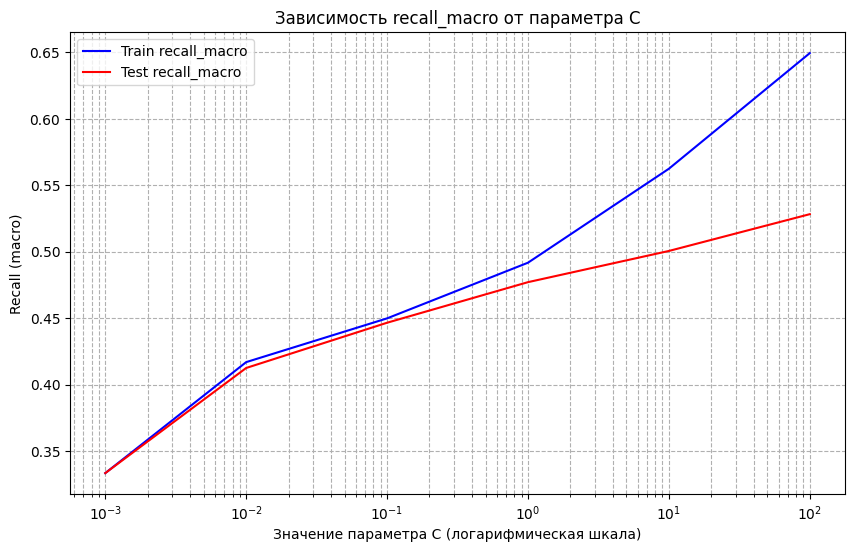

In [42]:
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_recalls, 'b-', label='Train recall_macro')
plt.semilogx(C_values, test_recalls, 'r-', label='Test recall_macro')
plt.xlabel('Значение параметра C (логарифмическая шкала)')
plt.ylabel('Recall (macro)')
plt.title('Зависимость recall_macro от параметра C')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [52]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

best_model = SVC(kernel='rbf', C=100, probability=True)
best_model.fit(X_train, y_train)
y_probs = best_model.predict_proba(X_test)

roc_auc_ovr = roc_auc_score(y_test, y_probs, multi_class='ovr')
roc_auc_ovo = roc_auc_score(y_test, y_probs, multi_class='ovo')

print(f'ROC AUC (ovr): {roc_auc_ovr:.4f}')
print(f'ROC AUC (ovo): {roc_auc_ovo:.4f}')

ROC AUC (ovr): 0.7680
ROC AUC (ovo): 0.7728


In [60]:
param_grid = {'kernel':['rbf', 'poly'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc_new = SVC()
grid = GridSearchCV(svc_new, param_grid, scoring = 'recall_macro', cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly']},
             scoring='recall_macro')

In [59]:
print(f"Лучшие параметры: {grid.best_params_}")
print(f"Лучший recall_macro: {grid.best_score_:.2f}")

Лучшие параметры: {'C': 100, 'kernel': 'rbf'}
Лучший recall_macro: 0.53
